<a href="https://colab.research.google.com/github/LauraOgba/Artificial-Intelligence/blob/master/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering Dataset**

---



- Import Various Libraries

In [137]:
#import numpy for numerical processing
import numpy as np
#import pandas for data manipulation
import pandas as pd
#import pandas for reading csv
from pandas import read_csv
#import matplotlib for data visualization
import matplotlib.pyplot as plt
#import seaborn for data visualization
import seaborn as sns
#import sklearn for machine learning
from sklearn.cluster import KMeans
#import sklearn for clustering algorithms
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
!pip install utils
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Cluster Assignment')
import utils as ad

- Load Dataset

In [138]:
#Import the drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
#read csv file from drive
att = pd.read_csv("/content/drive/MyDrive/Cluster Assignment/assessment_cluster_dataset.csv")
att.head()



att1      att2      att3
0 -3.218423 -0.575000 -3.881158
1  5.801795 -1.340335 -0.201488
2  1.394402 -1.112765 -4.646334
3  4.767334 -2.324507  4.026738
4  4.590624 -1.456617 -1.873809

In [140]:
#Printing information on the data
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    1500 non-null   float64
 1   att2    1500 non-null   float64
 2   att3    1500 non-null   float64
dtypes: float64(3)
memory usage: 35.3 KB


In [141]:
att.describe()

att1         att2         att3
count  1500.000000  1500.000000  1500.000000
mean      1.590267    -0.031389    -0.420662
std       2.963958     1.750105     3.087797
min      -4.661216    -3.896381    -6.361849
25%      -1.310032    -1.036573    -3.325445
50%       1.726168    -0.360621    -1.101806
75%       4.239675     1.106294     2.619525
max       7.470099     3.763953     6.651459

                        
# **Historgram For Attribution Data**

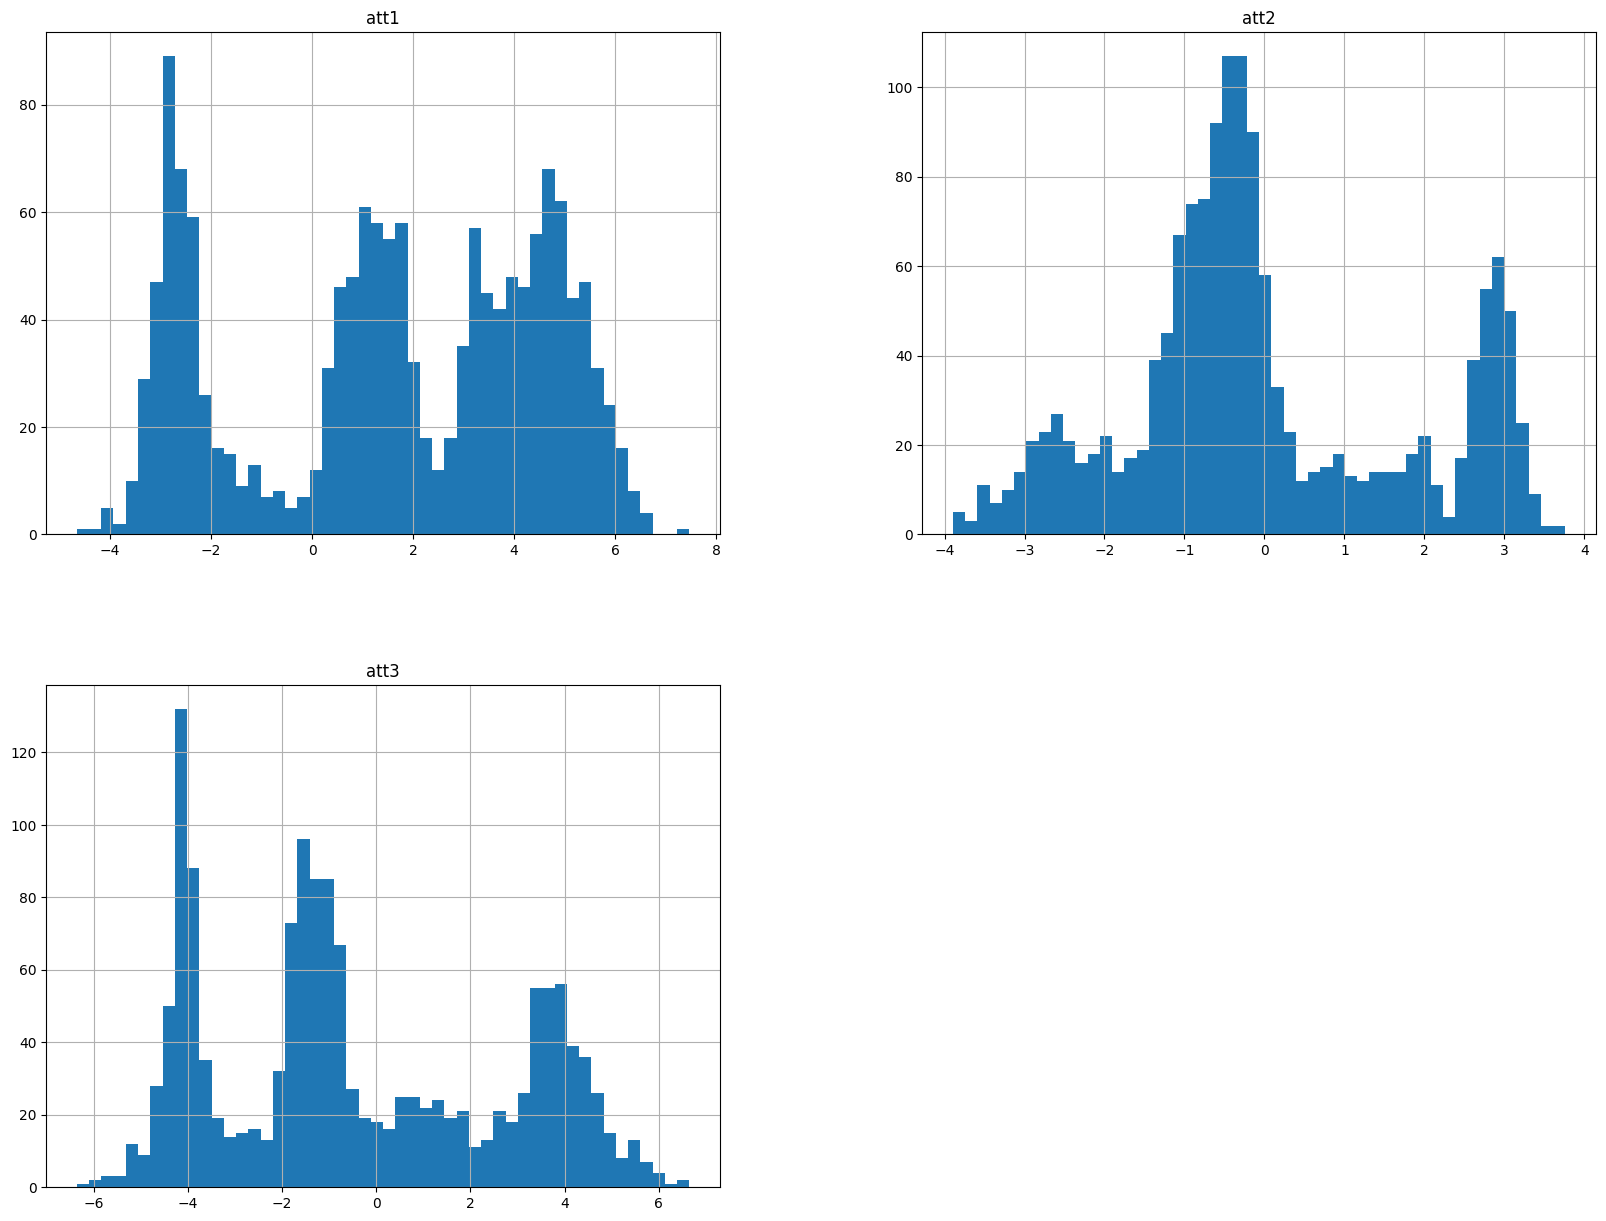

In [142]:
# Create and display histograms for each column in 'att'
# Create histograms with 50 bins and a specific figure size
att.hist(bins=50, figsize=(20,15))
# Display the histograms
plt.show()

# **Scatter Plot**

In [143]:
## generate a 3d scaterplot using 3 columns/properties of 3 attributions
fig = px.scatter_3d(att, x='att1',
                    y='att2', z='att3')

fig.show() ## this is optional in notebooks, but necessary in py files


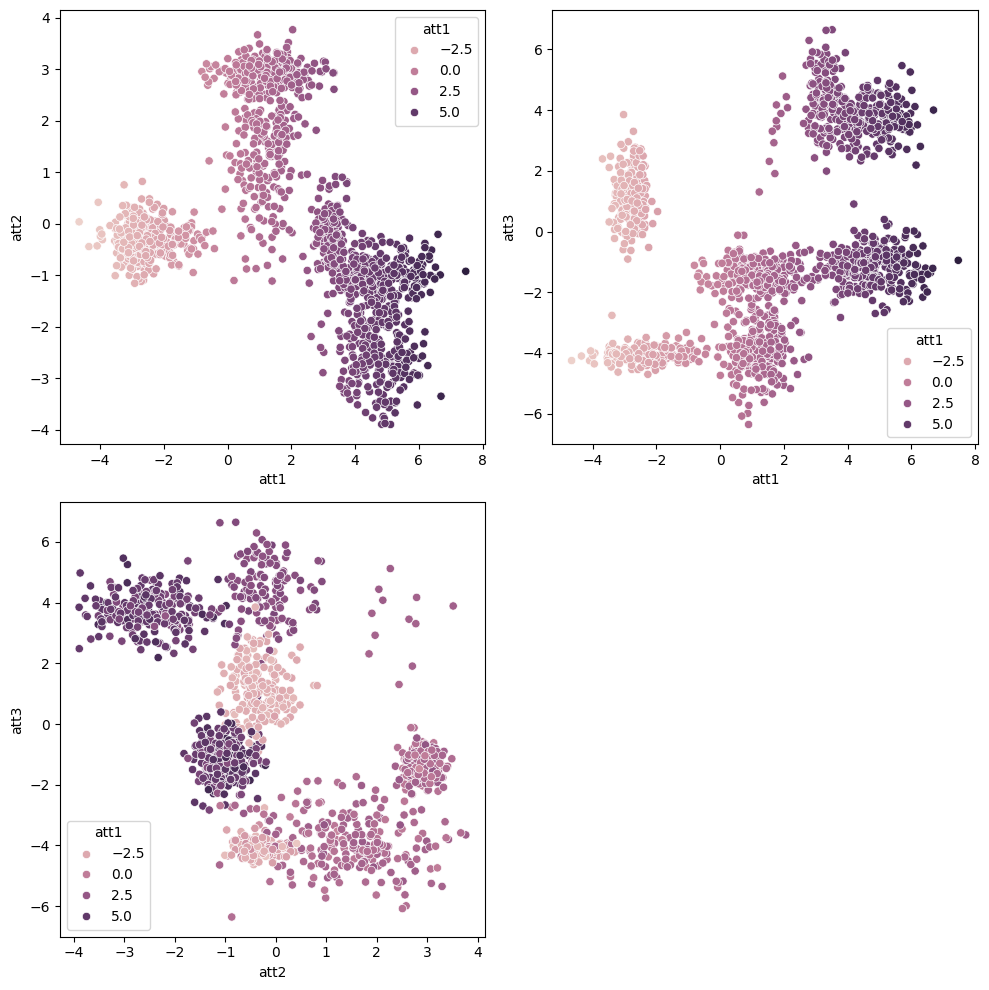

In [144]:
from itertools import combinations

# Get the column names of the Attribution Dataset
cols = att.columns

# Generate combinations of column indices, considering the actual number of columns
indices_combinations = list(combinations(range(len(cols)), 2))

#Create the figure and subplots
plt.figure(figsize=(10, 10))

# Iterate through the combinations and create scatter plots
for pair in enumerate(indices_combinations):
  plt.subplot(len(cols)//2 + 1, 2, pair[0] + 1)

  # Create a scatter plot for each pair of columns
  sns.scatterplot(att, x=cols[pair[1][0]],
                    y=cols[pair[1][1]], hue='att1')
plt.tight_layout()
plt.show()

In [145]:
## generate a 3d scatterplot with datapoints coloured by iris type
fig = px.scatter_3d(att, x='att1',
                    y='att2', z='att3',
                    color='att1')

fig.show()

# **Scaling the Attribution Dataset**

In [146]:
# create the scaler object
scaler = StandardScaler()
# train the scaler on the attribution data
scaler.fit(att)
# apply it to the attribution data to transform it and assign it to another variable
att_scaled = scaler.transform(att)
# create a new dataframe
att_scaled = pd.DataFrame(att_scaled, columns=att.columns)
att_scaled.head()

att1      att2      att3
0 -1.622929 -0.310720 -1.121074
1  1.421388 -0.748173  0.071004
2 -0.066104 -0.618098 -1.368963
3  1.072258 -1.310712  1.440795
4  1.012618 -0.814639 -0.470767

# **K-Means Clustering on the Attribution Dataset**

In [147]:
# Initialize KMeans model with 2 clusters
krandom_model = KMeans(n_clusters = 3, init='random',
                random_state=1).set_output(transform='pandas')
# train and transform the scaled data
results = krandom_model.fit_transform(att)
results.head()

kmeans0   kmeans1   kmeans2
0  2.495166  5.327986  9.562945
1  8.530618  6.238700  2.453421
2  5.132542  3.775901  7.145551
3  9.389856  8.779538  2.435585
4  7.260252  4.963815  3.703568

In [148]:
# Get the cluster label for each row
krandom_model.labels_

array([0, 2, 1, ..., 2, 1, 0], dtype=int32)

In [149]:
# we can create a new dataframe by first making a copy of the scaled version
krandom_data = att.copy()
# then add the cluster labels as a new column
krandom_data['cluster'] = krandom_model.labels_
# print the first 5 rows of the new dataframe
krandom_data.head()

att1      att2      att3  cluster
0 -3.218423 -0.575000 -3.881158        0
1  5.801795 -1.340335 -0.201488        2
2  1.394402 -1.112765 -4.646334        1
3  4.767334 -2.324507  4.026738        2
4  4.590624 -1.456617 -1.873809        2

In [150]:
# access the centroid vectors
krandom_model.cluster_centers_

array([[-2.57233837, -0.33845593, -1.48272695],
       [ 1.22659251,  2.10410593, -2.67630738],
       [ 4.41743647, -1.34583195,  1.82404789]])

In [151]:
# create a dataframe with these centroids
centroid_table = pd.DataFrame(krandom_model.cluster_centers_,
                              columns=att.columns)
centroid_table['cluster'] = ['centroid 0',
                             'centroid 1', 'centroid 2']
centroid_table

att1      att2      att3     cluster
0 -2.572338 -0.338456 -1.482727  centroid 0
1  1.226593  2.104106 -2.676307  centroid 1
2  4.417436 -1.345832  1.824048  centroid 2

<Axes: >

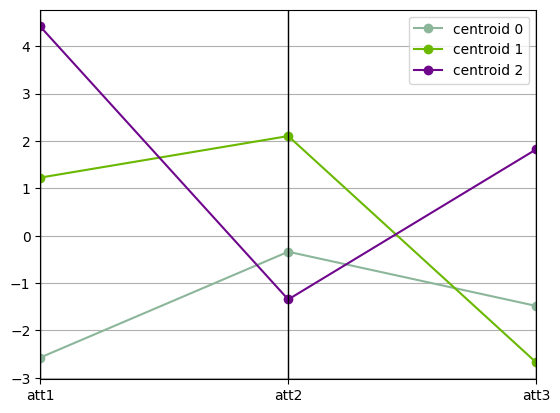

In [152]:
# plot the centroids across all iris properties/variables
parallel_coordinates(centroid_table, 'cluster',  marker='o')

In [153]:
# output the distribution of rows in each cluster
krandom_data['cluster'].value_counts()

cluster
2    646
1    455
0    399
Name: count, dtype: int64

In [154]:
# output the distribution of types of attribution data in each cluster
krandom_data.groupby('cluster').value_counts()

cluster  att1       att2       att3     
0        -4.661216   0.036259  -4.254551    1
         -4.353681  -0.443963  -4.104639    1
         -4.096139  -0.430458  -4.257831    1
         -4.062001   0.415466  -3.937247    1
         -4.013503  -0.117900  -4.138009    1
                                           ..
2         6.519397  -0.843218  -1.407611    1
          6.600287  -0.206603  -1.361621    1
          6.670569  -0.993921  -1.214241    1
          6.693604  -3.347914   4.003293    1
          7.470099  -0.923412  -0.949478    1
Name: count, Length: 1500, dtype: int64

<Axes: xlabel='att1', ylabel='att2'>

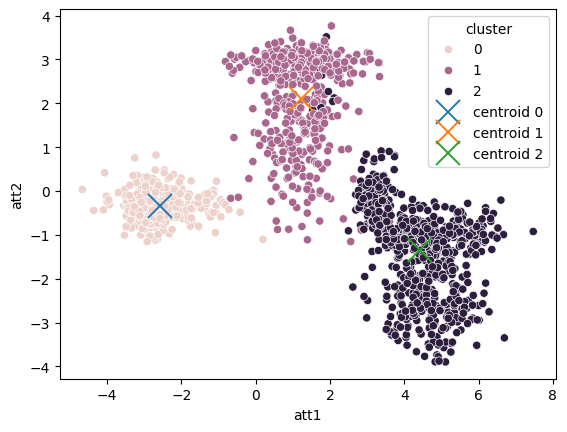

In [155]:
# we can also visualise the centroids of each cluster
sns.scatterplot(x='att1', y='att2',
                data=krandom_data, hue='cluster')
sns.scatterplot(x='att1', y='att2',
                data=centroid_table, hue='cluster',
                marker='x', s=300)

In [156]:
# generate a 3d scatterplot with datapoints coloured by cluster label
fig = px.scatter_3d(krandom_data, x='att1',
                    y='att2', z='att3',
              color='cluster')
fig.show()

In [157]:
new_rows = [[-2.0,	-1.8,	-0.55],
	[0.09,	0.001,	-0.06],
  [0.4,	1.27,	1.4]]
krandom_model.predict(new_rows)

array([0, 0, 1], dtype=int32)

Trying A different number of Clusters


*   We started with n_clusters = 3
*   We will be working with n_clusters = 6, in this example



In [158]:
# generate a kmeans model using 6 clusters instead of 2
k6_model = KMeans(n_clusters=6,
          random_state=1).set_output(transform='pandas')
results = k6_model.fit_transform(att)
results.head()

kmeans0    kmeans1   kmeans2   kmeans3   kmeans4    kmeans5
0   1.031818  11.148394  5.371473  5.067208  8.444999  10.438196
1   8.984229   4.229646  6.283082  8.767622  1.459388   5.455203
2   3.756419   9.101995  3.863476  7.207696  4.838521   9.253314
3  10.900821   0.364540  8.807969  8.331670  5.371697   2.863529
4   7.264124   5.687799  5.027916  8.068892  0.839543   6.573582

In [159]:
k6_data = att.copy()
k6_data['cluster'] = k6_model.labels_
k6_data.head()

att1      att2      att3  cluster
0 -3.218423 -0.575000 -3.881158        0
1  5.801795 -1.340335 -0.201488        4
2  1.394402 -1.112765 -4.646334        0
3  4.767334 -2.324507  4.026738        1
4  4.590624 -1.456617 -1.873809        4

In [160]:
centroid_table = pd.DataFrame(k6_model.cluster_centers_,
                              columns=att.columns)
centroid_table['cluster'] = ['centroid 0',
                             'centroid 1', 'centroid 2',
                             'centroid 3', 'centroid 4',
                             'centroid 5']
centroid_table

att1      att2      att3     cluster
0 -2.236701 -0.331369 -4.084907  centroid 0
1  4.709766 -2.504965  3.715272  centroid 1
2  1.218790  2.191132 -2.651372  centroid 2
3 -2.800975 -0.339958  1.163353  centroid 3
4  4.771817 -1.015311 -1.182976  centroid 4
5  3.148941  0.012880  4.369115  centroid 5

<Axes: >

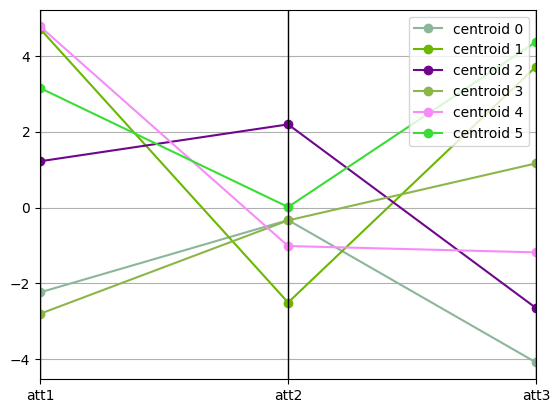

In [161]:
parallel_coordinates(centroid_table, 'cluster',  marker='o')

In [162]:
k6_data['cluster'].value_counts()

cluster
2    439
4    276
1    237
0    211
3    197
5    140
Name: count, dtype: int64

In [163]:
k6_data.groupby('cluster')['att1'].value_counts()

cluster  att1     
0        -4.661216    1
         -4.353681    1
         -4.096139    1
         -4.062001    1
         -4.013503    1
                     ..
5         3.779032    1
          3.797241    1
          3.894736    1
          3.919525    1
          3.926915    1
Name: count, Length: 1500, dtype: int64

<Axes: xlabel='att1', ylabel='att2'>

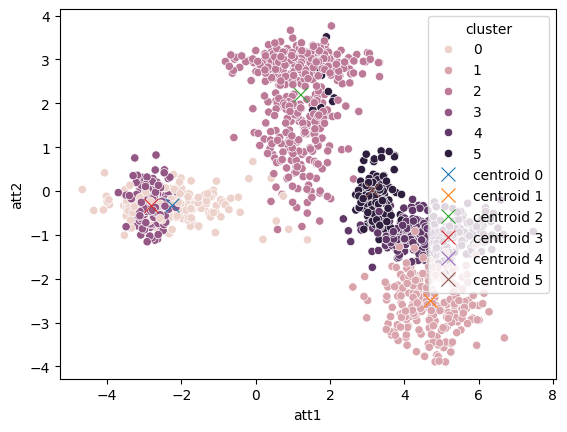

In [164]:
sns.scatterplot(x='att1', y='att2',
                data=k6_data, hue='cluster')
sns.scatterplot(x='att1', y='att2',
                data=centroid_table, hue='cluster',
                marker='x', s=100)

In [165]:
fig = px.scatter_3d(k6_data, x='att1',
                    y='att2', z='att3',
              color='cluster')
fig.show()

**K-Means Iterative Approach for a different number of clusters**

In [166]:
# automate experimenting with various numbers of clusters using for loops
# 1. create an empty list to store the generated models; initially it doesn't have any models
models = []
## assume we want to try cluster numbers ranging from 2 to 4 inclusively
for n in range(4, 8):
  ## for each number of clusters we try 2 initialisation methods - random and kmeans++
  for init in ['k-means++', 'random']:
    ## generate the model
    model = KMeans(n_clusters=n,
                            init=init)
    ## train and transform the scaled data
    labels = model.fit_predict(att)
    ## create a new dataframe and add the cluster and actual labels
    k_data = att.copy()
    k_data['cluster'] = model.labels_
    ## add the model to the list
    models.append((n, init, k_data))

print(len(models))



8


In [167]:
## we can then go through each model and output the
## distribution of iris types in each cluster
for pair in enumerate(models):
  print(f'{pair[1][1]} {pair[1][0]}')
  print(pair[1][2].groupby('cluster')['att1'].value_counts())
  print()

k-means++ 4
cluster  att1     
0        -0.809707    1
         -0.707015    1
         -0.666202    1
         -0.664886    1
         -0.625111    1
                     ..
3         6.497896    1
          6.519397    1
          6.600287    1
          6.670569    1
          7.470099    1
Name: count, Length: 1500, dtype: int64

random 4
cluster  att1    
0        1.541078    1
         1.634862    1
         1.685655    1
         1.759759    1
         1.764154    1
                    ..
3        3.061911    1
         3.085242    1
         3.306624    1
         3.334107    1
         3.335696    1
Name: count, Length: 1500, dtype: int64

k-means++ 5
cluster  att1    
0        1.541078    1
         1.634862    1
         1.685655    1
         1.759759    1
         1.764154    1
                    ..
4        0.420544    1
         0.555552    1
         0.746400    1
         0.891675    1
         1.394402    1
Name: count, Length: 1500, dtype: int64

random 5
cluster  a

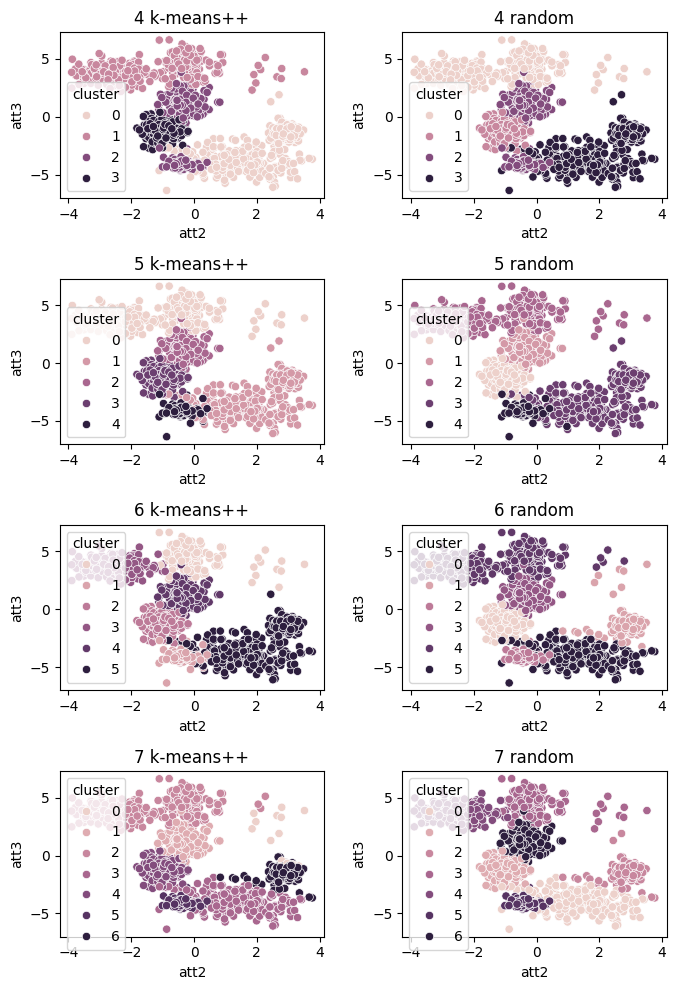

In [168]:
# generate some 2d scatterplots for each model
plt.figure(figsize=(7, 10))
for pair in enumerate(models):
  plt.subplot(int(len(models)/2), 2, pair[0] + 1)
  plt.title(f'{pair[1][0]} {pair[1][1]}')
  sns.scatterplot(pair[1][2], x='att2',
                  y='att3', hue='cluster'),

plt.tight_layout()
plt.show()

**Experimenting with Parameter Settings**

In [169]:
 #define the range of values to try out for each hyperparameter

param_grid = {
    'n_clusters': range(2, 10),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'random_state': [1, 16, 34, 57]
}
# create the kmeans model
kmeans = KMeans()
# use the grid search to try out all possible combinations
# of hyperparameter values from the grid above and fit a new model for each
grid_search = GridSearchCV(kmeans, param_grid)
grid_search.fit(att)
# output the hyperparameter values of the model that achieved highest performance
grid_search.best_params_

{'init': 'k-means++',
 'max_iter': 100,
 'n_clusters': 9,
 'n_init': 10,
 'random_state': 1}

# **Hierarchical Clustering**

Using Single Linkage

In [170]:
single_agg_model = AgglomerativeClustering(n_clusters=4,
                          linkage='single')
single_labels = single_agg_model.fit_predict(att)
single_labels

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
single_agg_data = att.copy()
single_agg_data['cluster'] = single_agg_model.labels_
single_agg_data.head()

att1      att2      att3  cluster
0 -3.218423 -0.575000 -3.881158        0
1  5.801795 -1.340335 -0.201488        0
2  1.394402 -1.112765 -4.646334        0
3  4.767334 -2.324507  4.026738        0
4  4.590624 -1.456617 -1.873809        0

In [172]:
fig = px.scatter_3d(single_agg_data, x='att1',
                    y='att2', z='att3',
              color='cluster')
fig.show()

In [173]:
single_agg_data.groupby('cluster'
        )['att1'].value_counts()

cluster  att1     
0        -4.661216    1
         -4.353681    1
         -4.096139    1
         -4.062001    1
         -4.013503    1
                     ..
2         1.905796    1
          1.958359    1
          2.075215    1
          2.114182    1
3         0.891675    1
Name: count, Length: 1500, dtype: int64

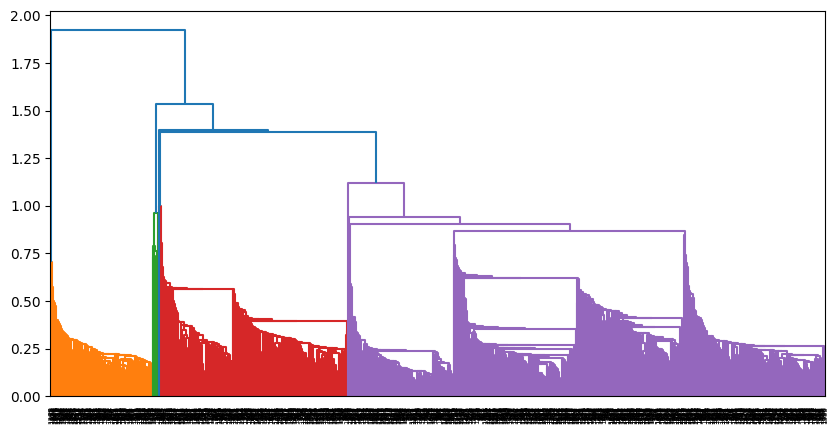

In [174]:
# plot the dendrogram of the single linkage results
plt.figure(figsize=(10, 5))
dendrogram(linkage(att, 'single'),leaf_rotation=90)
plt.show()

Using Complete Linkage

In [175]:
comp_agg_model = AgglomerativeClustering(n_clusters=6,
                          linkage='complete')
comp_labels = comp_agg_model.fit_predict(att)
comp_agg_data = att.copy()
comp_agg_data['cluster'] = comp_agg_model.labels_
comp_agg_data.head()

att1      att2      att3  cluster
0 -3.218423 -0.575000 -3.881158        4
1  5.801795 -1.340335 -0.201488        3
2  1.394402 -1.112765 -4.646334        0
3  4.767334 -2.324507  4.026738        1
4  4.590624 -1.456617 -1.873809        3

In [176]:
print(comp_agg_data.groupby('cluster'
        )['att1'].value_counts())
fig = px.scatter_3d(comp_agg_data, x='att1',
                    y='att2', z='att3',
              color='cluster')
fig.show()

cluster  att1     
0        -0.809707    1
         -0.707015    1
         -0.666202    1
         -0.625111    1
         -0.596628    1
                     ..
5         1.777160    1
          1.905796    1
          1.958359    1
          2.075215    1
          2.114182    1
Name: count, Length: 1500, dtype: int64


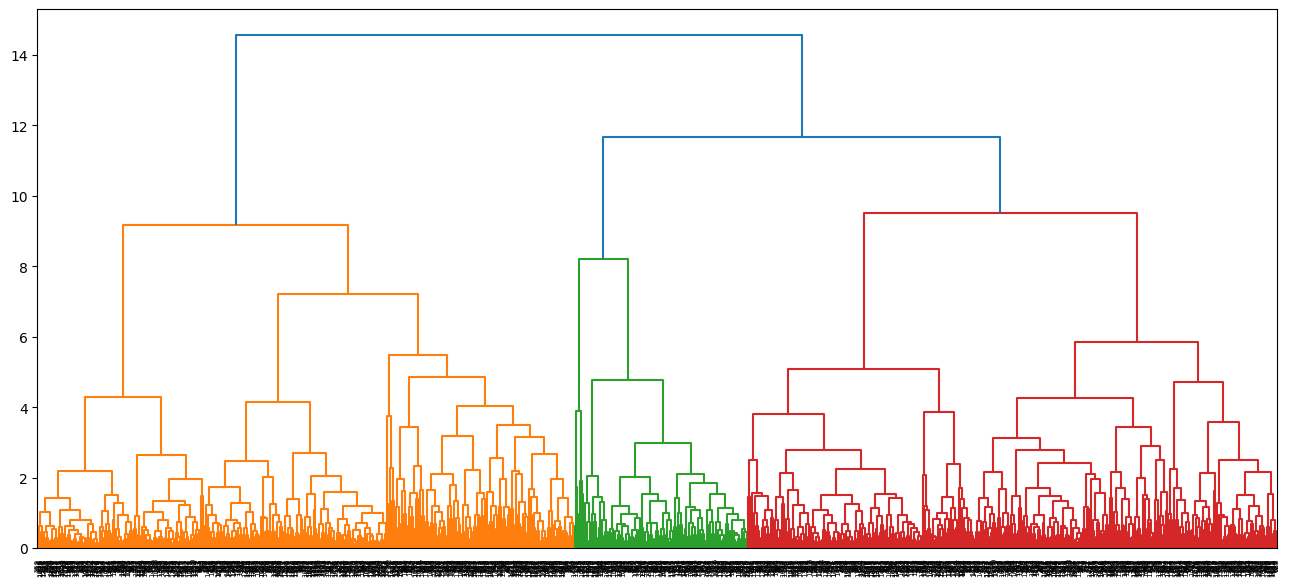

In [177]:
# plot the dendrogram of the complete linkage results
plt.figure(figsize=(16, 7))
dendrogram(linkage(att, 'complete'),
           leaf_rotation=90)
plt.show()

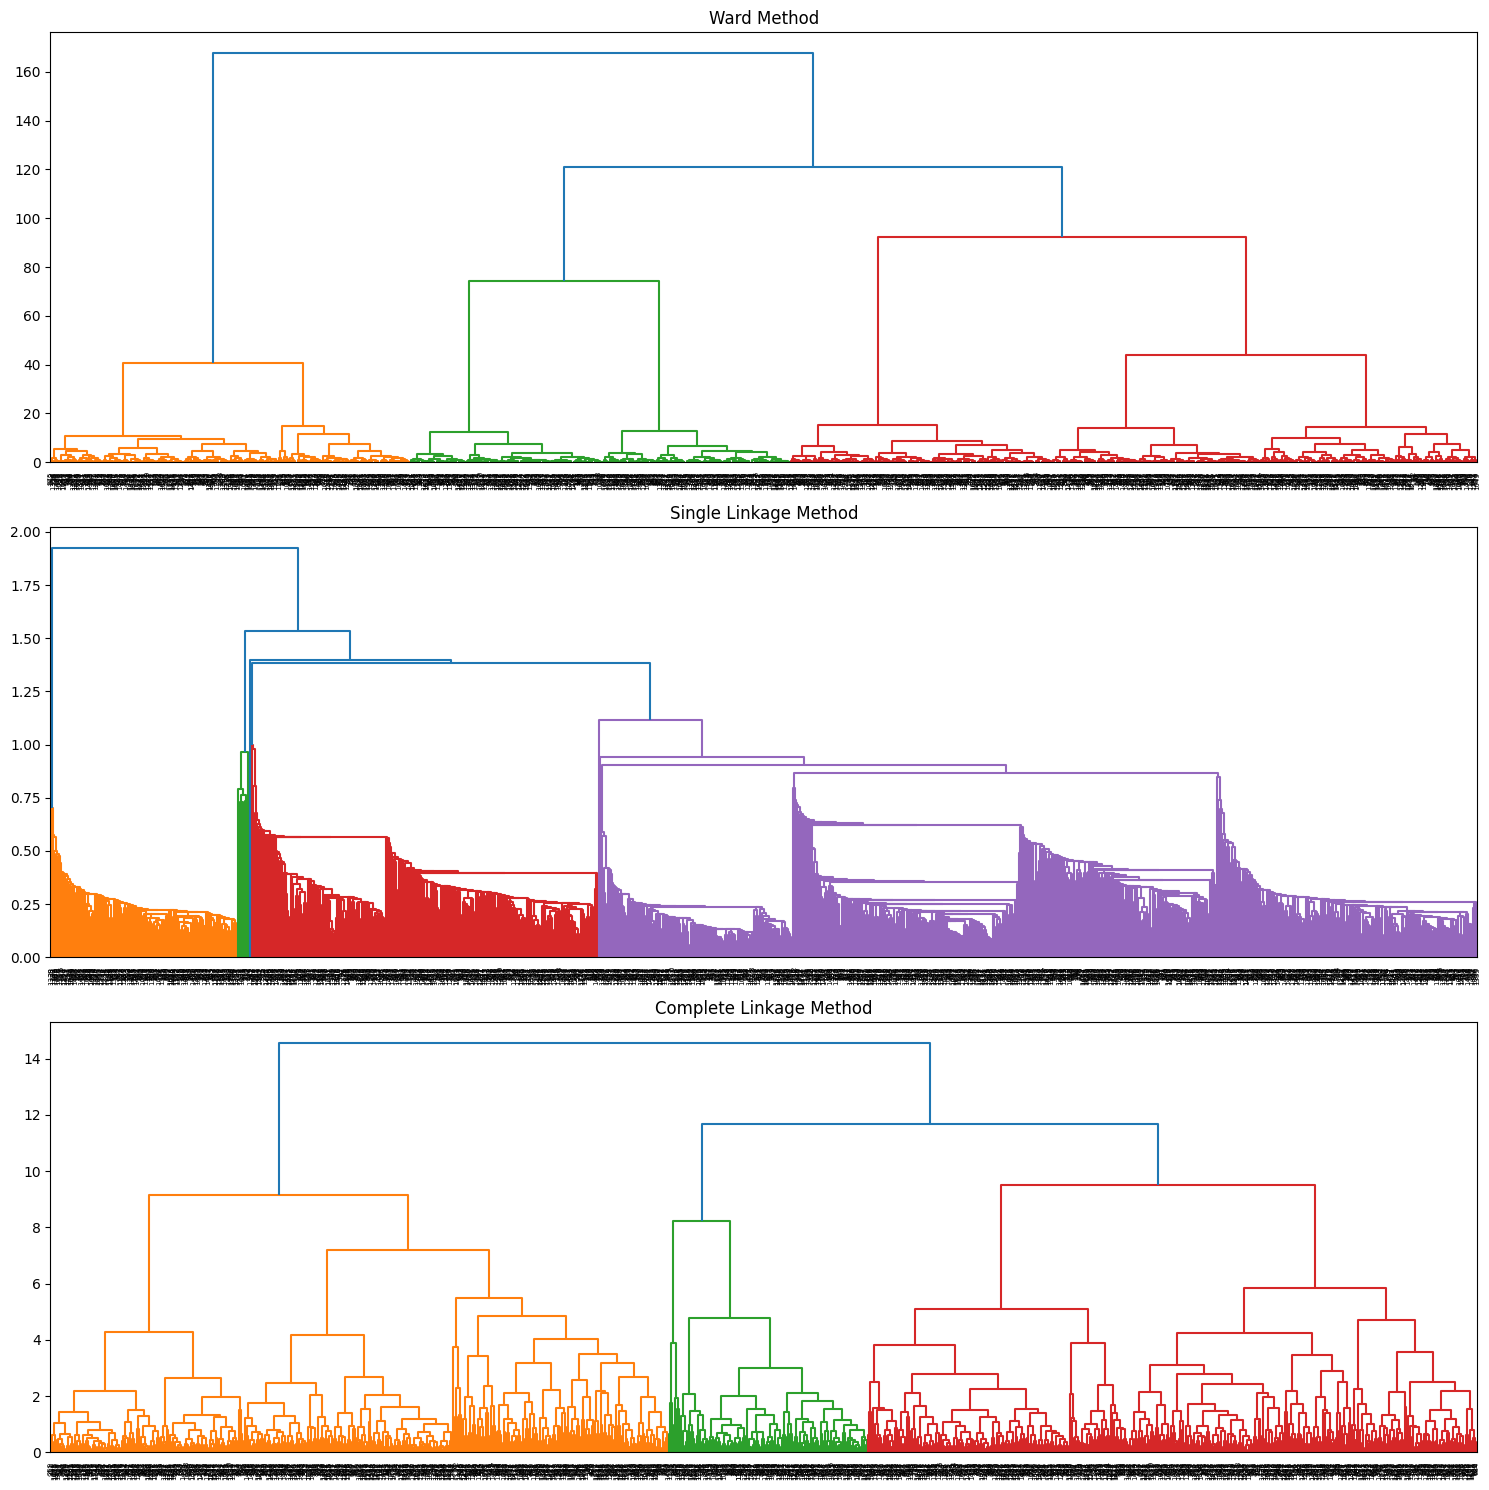

In [178]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
# Plot the dendrograms for each linkage method
dendrogram(linkage(att, 'ward'),
            leaf_rotation=90, ax=axs[0])

axs[0].set_title("Ward Method")
dendrogram(linkage(att, 'single'),
            leaf_rotation=90, ax=axs[1])

axs[1].set_title("Single Linkage Method")
dendrogram(linkage(att, 'complete'),

          leaf_rotation=90, ax=axs[2])
axs[2].set_title("Complete Linkage Method")
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# **Automating model**

In [179]:
models = []
for n in range(2, 5):
  for link in ['ward', 'average', 'single', 'complete']:
    model = AgglomerativeClustering(n_clusters=n,
                            linkage=link)
    labels = model.fit_predict(att)
    agg_data = att.copy()
    agg_data['cluster'] = model.labels_
    models.append((n, link, agg_data))



In [180]:
for pair in enumerate(models):
  print(f'{pair[1][0]} {pair[1][1]}')
  print(pair[1][2].groupby('cluster').value_counts())
  print()

2 ward
cluster  att1       att2       att3     
0        -4.661216   0.036259  -4.254551    1
         -4.353681  -0.443963  -4.104639    1
         -4.096139  -0.430458  -4.257831    1
         -4.062001   0.415466  -3.937247    1
         -4.013503  -0.117900  -4.138009    1
                                           ..
1         6.111206  -2.568162   4.117508    1
          6.146132  -2.329617   2.189205    1
          6.189611  -2.099322   3.515773    1
          6.280723  -2.753984   2.805878    1
          6.693604  -3.347914   4.003293    1
Name: count, Length: 1500, dtype: int64

2 average
cluster  att1       att2       att3     
0        -4.661216   0.036259  -4.254551    1
         -4.353681  -0.443963  -4.104639    1
         -4.096139  -0.430458  -4.257831    1
         -4.062001   0.415466  -3.937247    1
         -4.013503  -0.117900  -4.138009    1
                                           ..
1         6.519397  -0.843218  -1.407611    1
          6.600287  -0.206603  -

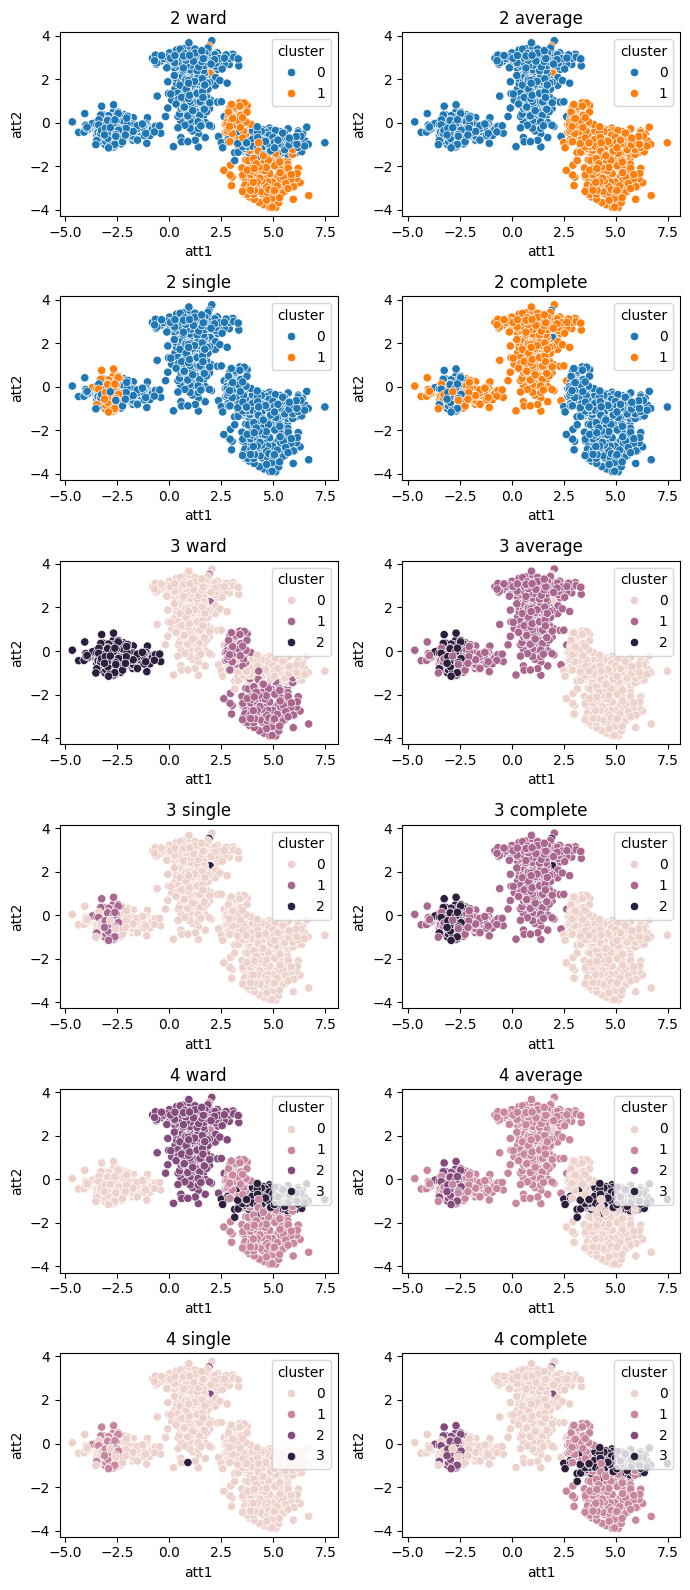

In [181]:
# generate some 2d scatterplots for each model
plt.figure(figsize=(7, 16))
for pair in enumerate(models):
  plt.subplot(int(len(models)/2), 2, pair[0] + 1)
  plt.title(f'{pair[1][0]} {pair[1][1]}')
  sns.scatterplot(pair[1][2], x='att1',
                    y='att2', hue='cluster')
plt.tight_layout()
plt.show()

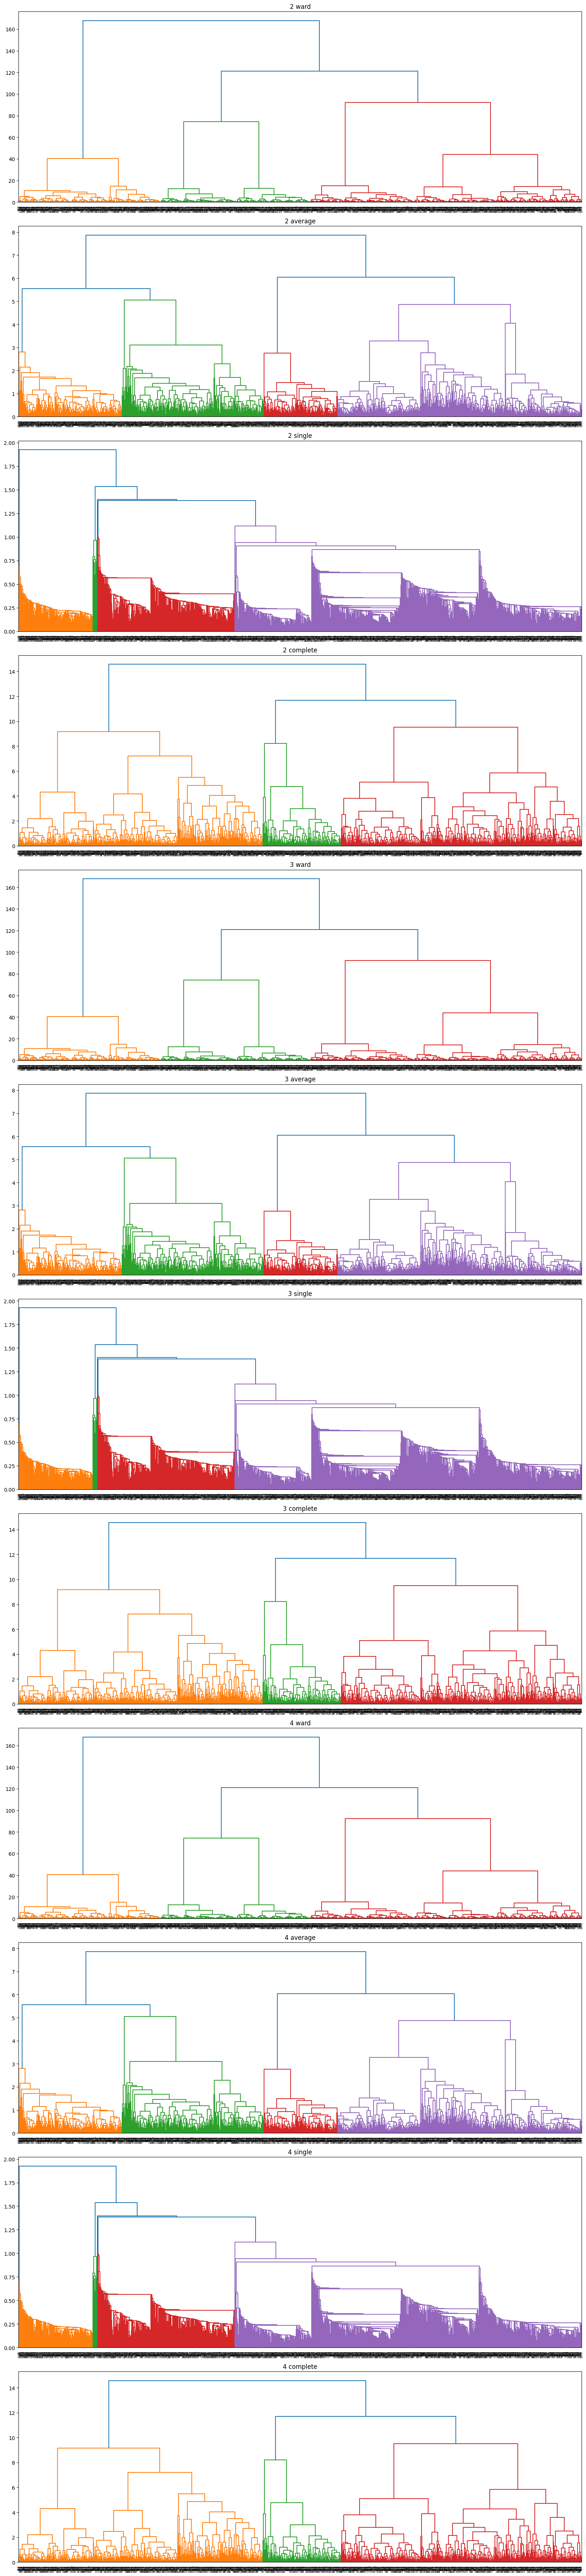

In [182]:
# Create a figure with multiple subplots
num_models = 12
count = 0
fig, axs = plt.subplots(12, 1, figsize=(16, 70))

for n in range(2, 5):
  for link in ['ward', 'average', 'single', 'complete']:
    Z = linkage(att, link)
    dendrogram(Z, leaf_rotation=90, ax=axs[count])
    axs[count].set_title(f'{n} {link}')
    count += 1


# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# **Ward Linkage**

In [183]:
ward_agg_model = AgglomerativeClustering(n_clusters=3,
                          linkage='ward')
ward_labels = ward_agg_model.fit_predict(att)
ward_agg_data = att.copy()
ward_agg_data['cluster'] = ward_agg_model.labels_
ward_agg_data.head()

att1      att2      att3  cluster
0 -3.218423 -0.575000 -3.881158        2
1  5.801795 -1.340335 -0.201488        0
2  1.394402 -1.112765 -4.646334        0
3  4.767334 -2.324507  4.026738        1
4  4.590624 -1.456617 -1.873809        0

In [184]:
print(ward_agg_data.groupby('cluster'
        ).value_counts())
fig = px.scatter_3d(ward_agg_data, x='att1',
                    y='att2', z='att3',
              color='cluster')
fig.show()

cluster  att1       att2       att3     
0        -0.809707   2.953633  -1.114722    1
         -0.707015   2.842880  -1.478121    1
         -0.666202   3.102382  -1.373578    1
         -0.625111   2.687627  -1.925004    1
         -0.596628   2.750786  -1.660790    1
                                           ..
2        -0.801779  -0.241582  -3.921540    1
         -0.717380  -0.424706  -3.964054    1
         -0.664886  -0.164964  -4.292155    1
         -0.462627  -0.142322  -4.045932    1
         -0.415117  -0.483896  -3.857482    1
Name: count, Length: 1500, dtype: int64


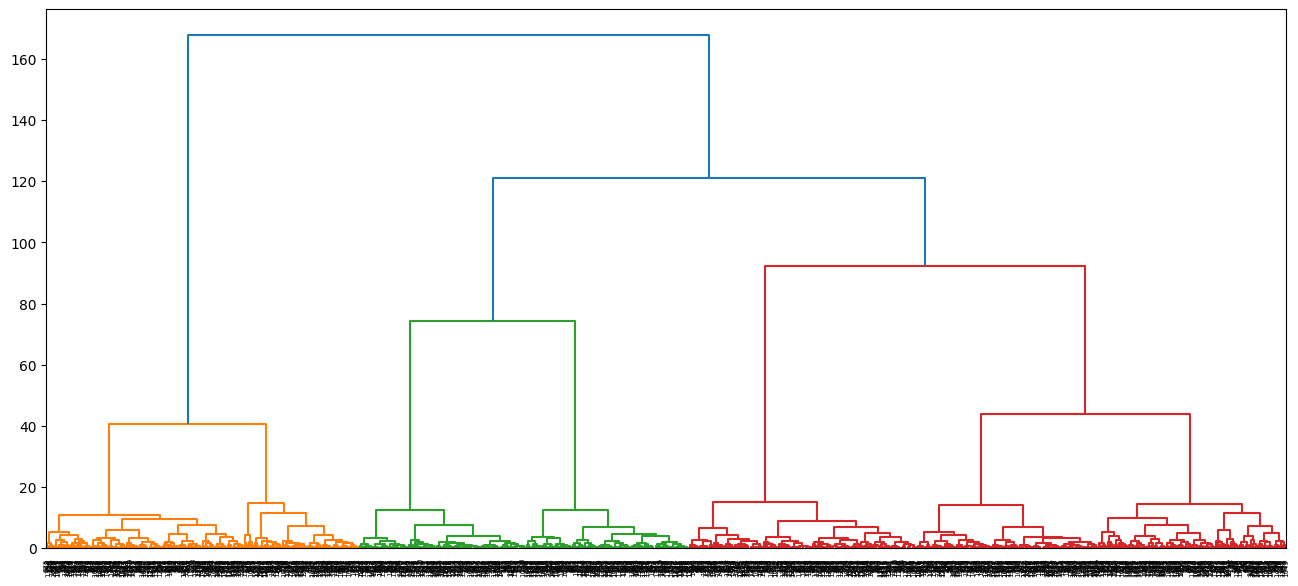

In [185]:
# plot the dendrogram of the ward linkage results
plt.figure(figsize=(16, 7))
dendrogram(linkage(att, 'ward'),
          leaf_rotation=90)
plt.show()

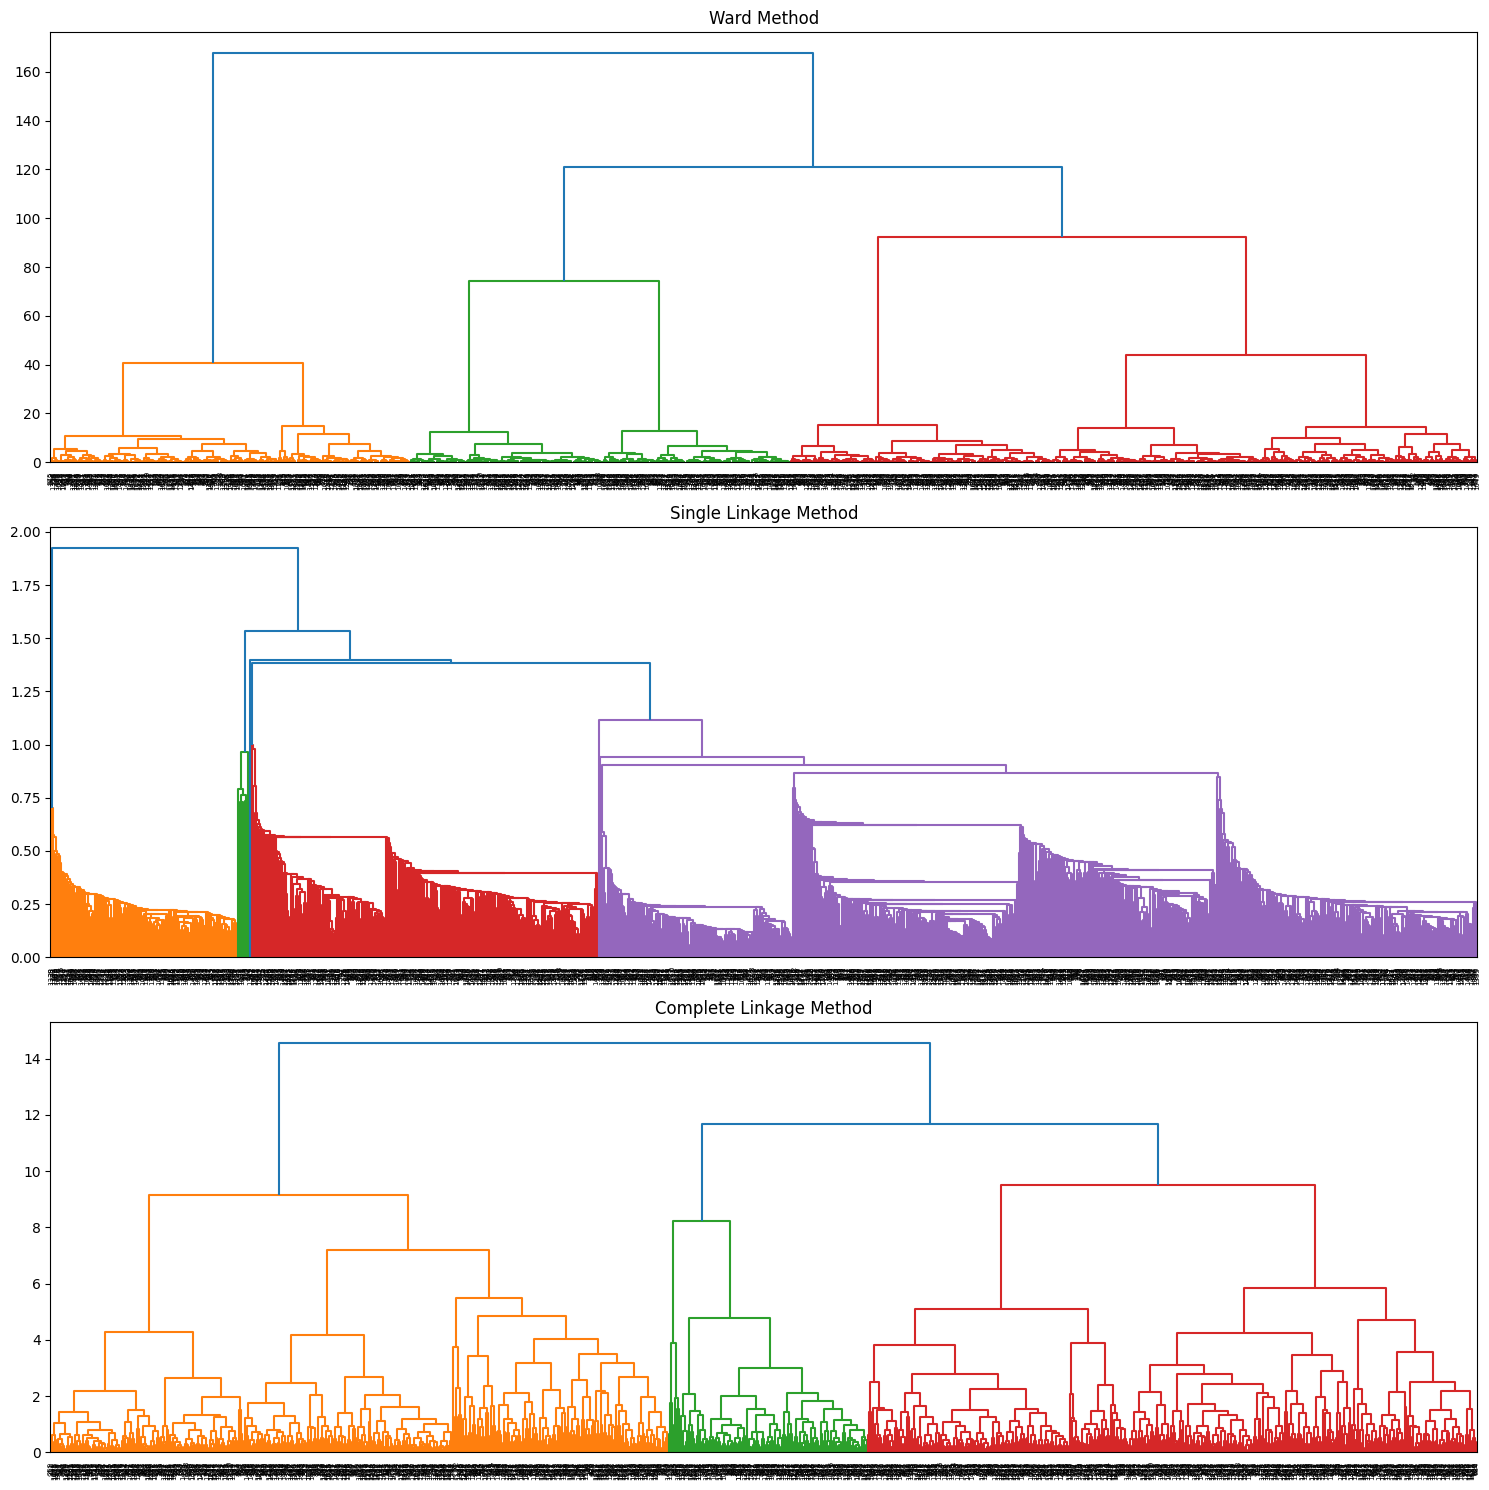

In [186]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
# Plot the dendrograms for each linkage method
dendrogram(linkage(att, 'ward'),
            leaf_rotation=90, ax=axs[0])

axs[0].set_title("Ward Method")
dendrogram(linkage(att, 'single'),
           leaf_rotation=90, ax=axs[1])
axs[1].set_title("Single Linkage Method")
dendrogram(linkage(att, 'complete'),
          leaf_rotation=90, ax=axs[2])
axs[2].set_title("Complete Linkage Method")
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# **Automating Linkage Model**

In [187]:
models = []
for n in range(2, 5):
  for link in ['ward', 'average', 'single', 'complete']:
    model = AgglomerativeClustering(n_clusters=n,
                            linkage=link)
    labels = model.fit_predict(att)
    agg_data = att.copy()
    agg_data['cluster'] = model.labels_
    models.append((n, link, agg_data))

In [188]:
for pair in enumerate(models):
  print(f'{pair[1][0]} {pair[1][1]}')
  print(pair[1][2].groupby('cluster').value_counts())
  print()

2 ward
cluster  att1       att2       att3     
0        -4.661216   0.036259  -4.254551    1
         -4.353681  -0.443963  -4.104639    1
         -4.096139  -0.430458  -4.257831    1
         -4.062001   0.415466  -3.937247    1
         -4.013503  -0.117900  -4.138009    1
                                           ..
1         6.111206  -2.568162   4.117508    1
          6.146132  -2.329617   2.189205    1
          6.189611  -2.099322   3.515773    1
          6.280723  -2.753984   2.805878    1
          6.693604  -3.347914   4.003293    1
Name: count, Length: 1500, dtype: int64

2 average
cluster  att1       att2       att3     
0        -4.661216   0.036259  -4.254551    1
         -4.353681  -0.443963  -4.104639    1
         -4.096139  -0.430458  -4.257831    1
         -4.062001   0.415466  -3.937247    1
         -4.013503  -0.117900  -4.138009    1
                                           ..
1         6.519397  -0.843218  -1.407611    1
          6.600287  -0.206603  -

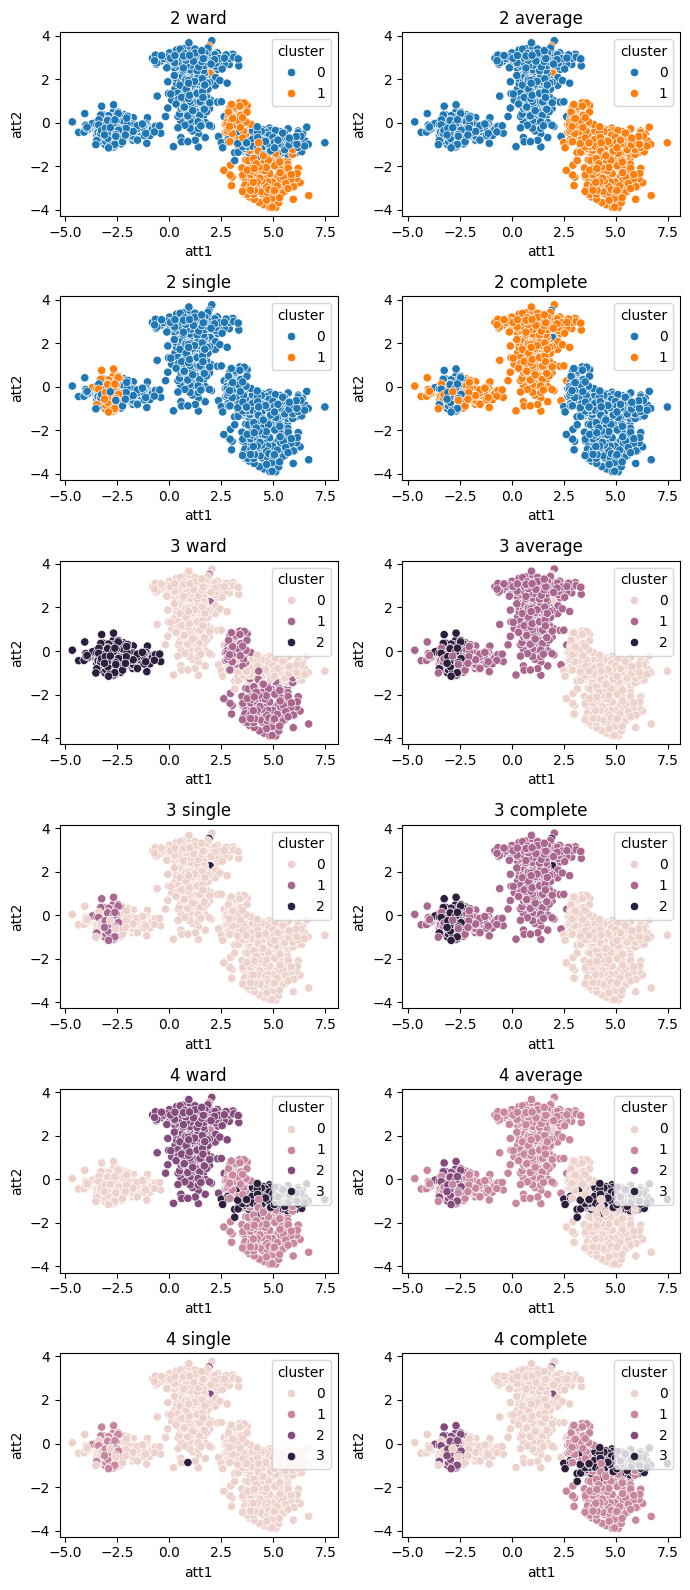

In [189]:
# generate some 2d scatterplots for each model
plt.figure(figsize=(7, 16))
for pair in enumerate(models):
  plt.subplot(int(len(models)/2), 2, pair[0] + 1)
  plt.title(f'{pair[1][0]} {pair[1][1]}')
  sns.scatterplot(pair[1][2], x='att1',
                    y='att2', hue='cluster')
plt.tight_layout()
plt.show()

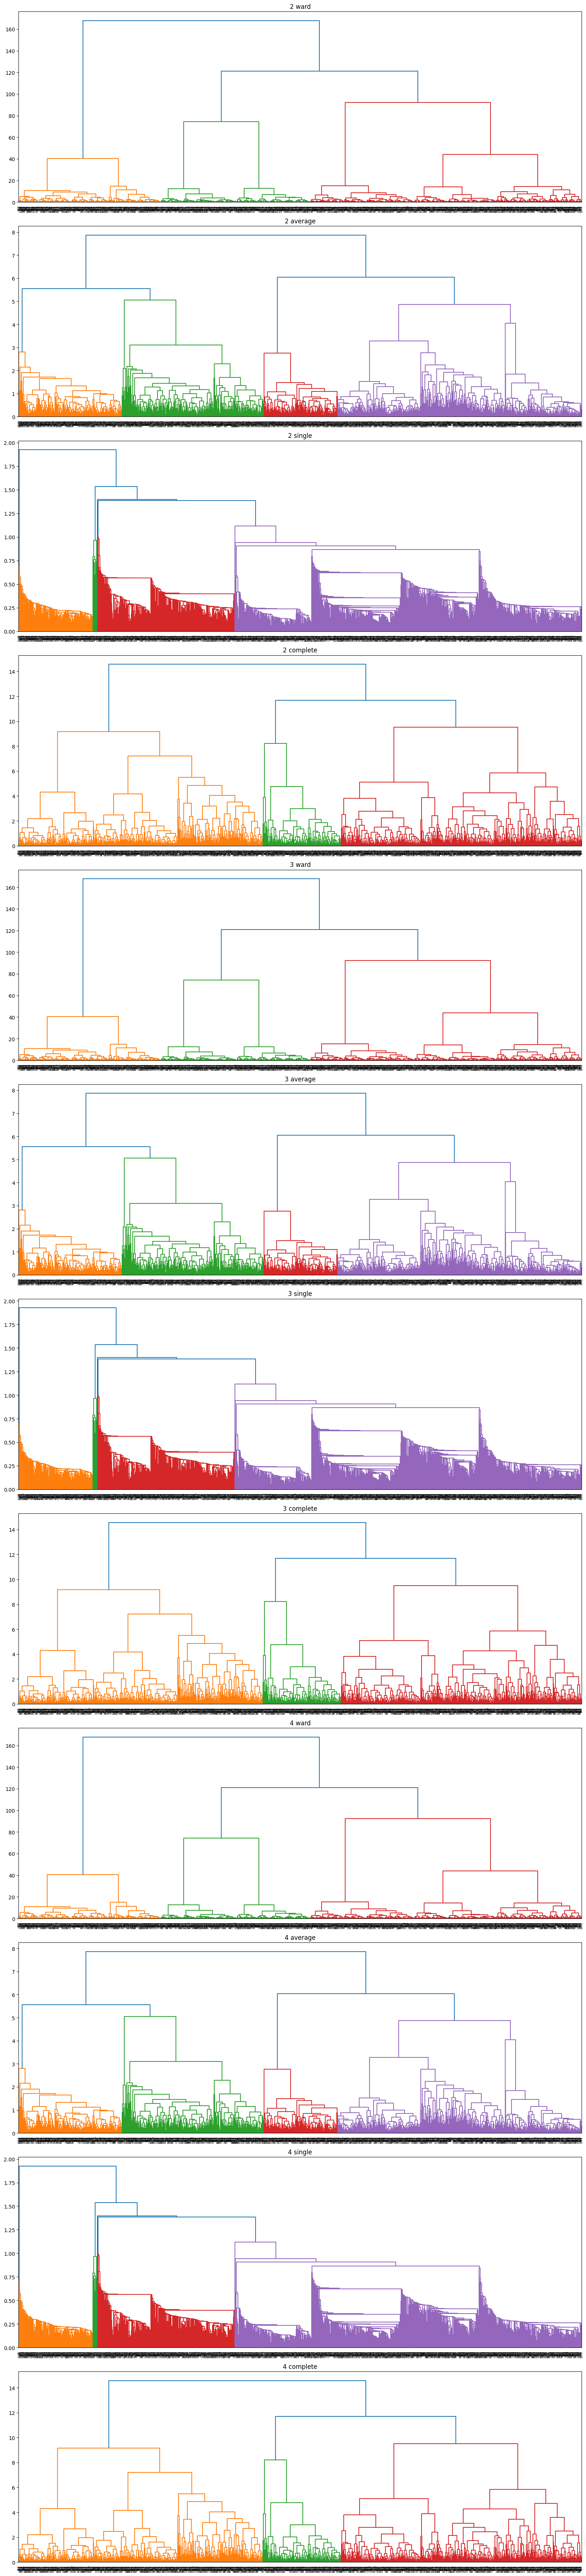

In [190]:
# Create a figure with multiple subplots
num_models = 12
count = 0
fig, axs = plt.subplots(12, 1, figsize=(16, 70))
for n in range(2, 5):
  for link in ['ward', 'average', 'single', 'complete']:
    Z = linkage(att, link)
    dendrogram(Z, leaf_rotation=90, ax=axs[count])
    axs[count].set_title(f'{n} {link}')
    count += 1


# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# **Search for optimal configuration**

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
param_grid = {
    'n_clusters': range(2, 16),
    'linkage': ['ward', 'average', 'single', 'complete'],
    }
aggl = AgglomerativeClustering()
grid_search = GridSearchCV(aggl, param_grid,
                    scoring=silhouette_score)
grid_search.fit(att)
grid_search.best_params_

{'linkage': 'ward', 'n_clusters': 2}